In [1]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dj.conn()

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

In [3]:
from pipeline import experiment, subject, intracellular, nwb_adapter, utilities

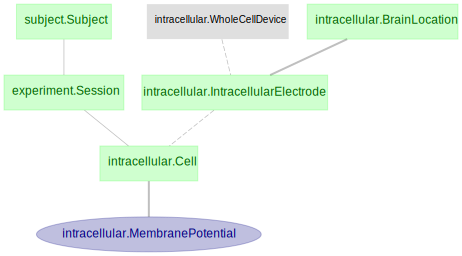

In [4]:
dj.Diagram(experiment.Session) - 1 + dj.Diagram(intracellular)

#### Quick note
+ `nwb_file` is stored as a `filepath` - stored as .nwb file externally
+ `nwb_device` is stored as a `longblob` - stored inside the database as native python dictionary
+ `ic_electrode` is stored as a `longblob` - stored inside the database as native python dictionary
+ `nwb_patch_clamp` is stored as a `filepath` - stored as .nwb file externally

### Show all sessions

In [6]:
experiment.Session()

subject_id id of the subject (e.g. ANM244028),session_time session time,session_note,nwb_file
anm300476,2017-05-20 18:28:59,ALM whole cell recording during M1 photoinhibition,=BLOB=
anm300476,2017-05-20 18:35:18,ALM whole cell recording during M1 photoinhibition,=BLOB=
anm300476,2017-05-20 18:42:55,ALM whole cell recording during M1 photoinhibition,=BLOB=
anm300476,2017-05-20 18:43:57,ALM whole cell recording during M1 photoinhibition,=BLOB=
anm300476,2017-05-20 18:44:45,ALM whole cell recording during M1 photoinhibition,=BLOB=
anm300476,2017-05-20 18:47:27,ALM whole cell recording during M1 photoinhibition,=BLOB=
anm322808,2017-05-20 19:25:29,ALM whole cell recording during thalamus photoinhibition,=BLOB=


### Pick one session of interest

In [7]:
session_key = {'subject_id': 'anm324792', 'session_time': '2017-05-20 19:34:36'}

### Fetch back the NWBFile for this session

In [8]:
nwb = (experiment.Session & session_key).fetch1('nwb_file')

In [9]:
nwb


root <class 'pynwb.file.NWBFile'>
Fields:
  experimenter: ['Hidehiko Inagaki']
  file_create_date: [datetime.datetime(2020, 5, 11, 13, 51, 31, 52647, tzinfo=tzoffset(None, -18000))]
  identifier: anm324792_170520_193436
  session_description: ALM whole cell recording during thalamus photoinhibition
  session_start_time: 2017-05-20 19:34:36-05:00
  subject: subject <class 'pynwb.file.Subject'>
  timestamps_reference_time: 2017-05-20 19:34:36-05:00

### Check the Intracellular Data for this session

In [10]:
intracellular.IntracellularElectrode * intracellular.Cell & session_key

brain_region,hemisphere,subject_id id of the subject (e.g. ANM244028),session_time session time,cell_id a string identifying the cell in which this intracellular recording is concerning,device_name,ic_electrode,cell_type
ALM,left,anm324792,2017-05-20 19:34:36,cell_64_1,Multiclamp_700B,=BLOB=,N/A


In [11]:
intracellular.MembranePotential & session_key

subject_id id of the subject (e.g. ANM244028),session_time session time,cell_id a string identifying the cell in which this intracellular recording is concerning,nwb_patch_clamp
anm324792,2017-05-20 19:34:36,cell_64_1,=BLOB=


### Fetch back electrode - a `pynwb.icephys.IntracellularElectrode` object

In [12]:
electrode = (intracellular.IntracellularElectrode * intracellular.Cell & session_key).fetch1('ic_electrode')

In [13]:
electrode


leftALM <class 'pynwb.icephys.IntracellularElectrode'>
Fields:
  description: N/A
  device: Multiclamp_700B <class 'pynwb.device.Device'>
  filtering: low-pass: 10kHz
  location: brain_region: ALM; hemisphere: left; coordinate_ref: bregma; coordinate_ap: 2.50; coordinate_ml: 1.50; coordinate_dv: 0.49

### Fetch back electrode - a `pynwb.icephys.PatchClampSeries` object

In [14]:
membrane_potential = (intracellular.MembranePotential & session_key).fetch1('nwb_patch_clamp')

In [15]:
membrane_potential


cell_64_1_membrane_potential <class 'pynwb.icephys.PatchClampSeries'>
Fields:
  comments: no comments
  conversion: 0.001
  data: <HDF5 dataset "data": shape (12071800,), type "<f4">
  description: no description
  electrode: leftALM <class 'pynwb.icephys.IntracellularElectrode'>
  gain: 1.0
  rate: 20000.0
  resolution: -1.0
  starting_time: 5e-05
  starting_time_unit: seconds
  stimulus_description: NA
  unit: mV

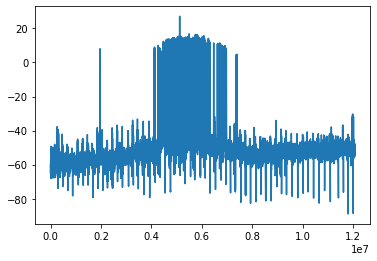

In [16]:
plt.plot(membrane_potential.data)